<a href="https://colab.research.google.com/github/PSY21801028/SYPark-HGU/blob/main/SequenceLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('data_set_train.xlsx')

In [ ]:
df.shape
df.columns
df.describe()
df.info()
df[df['Yongpae(용적률)'].isnull()].head()
df['Yongpae(용적률)']=df['Yongpae(용적률)'].replace(np.nan, df['Yongpae(용적률)'].mean())
df['dong(동)'].value_counts()
data1=df[['yyyyqrt(거래년도 분기별)', 'price(가격)','dong(동)']]
data1.head()
data2=data1.copy()
data2.columns=['yearqrt','price','dong']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aptnm(아파트 이름)              17400 non-null  object 
 1   yyyyqrt(거래년도 분기별)          17400 non-null  object 
 2   price(가격)                  17400 non-null  int64  
 3   con_year(건축년도)             17400 non-null  int64  
 4   dong(동)                    17400 non-null  object 
 5   area(면적)                   17400 non-null  float64
 6   floor(층수)                  17400 non-null  int64  
 7   Latitude(위도)               17400 non-null  float64
 8   Longtitude(경도)             17400 non-null  float64
 9   gdp                        17400 non-null  int64  
 10  e_grwth(경제성장률)             17400 non-null  float64
 11  Seoul_l.rate(지가상승률)        17400 non-null  float64
 12  house_rate(담보대출금리)         17400 non-null  float64
 13  dis_park(국립 공원과의 거리)       17400 non-null  flo

In [ ]:
data_gaepo=data2[data2['dong']=='개포동']
data_gaepo.head()
data_gaepo_time=data_gaepo.groupby('yearqrt').mean()
data_gaepo_time

<ipython-input-11-1ca5606a06fe>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_gaepo_time=data_gaepo.groupby('yearqrt').mean()


,price
yearqrt,
2006Q1,66954.968288
2006Q2,69240.408163
2006Q3,71064.128440
2006Q4,86538.140704
2007Q1,79064.285714
2007Q2,79900.581395
2007Q3,83373.809524
2007Q4,79498.275862
2008Q1,85955.714286


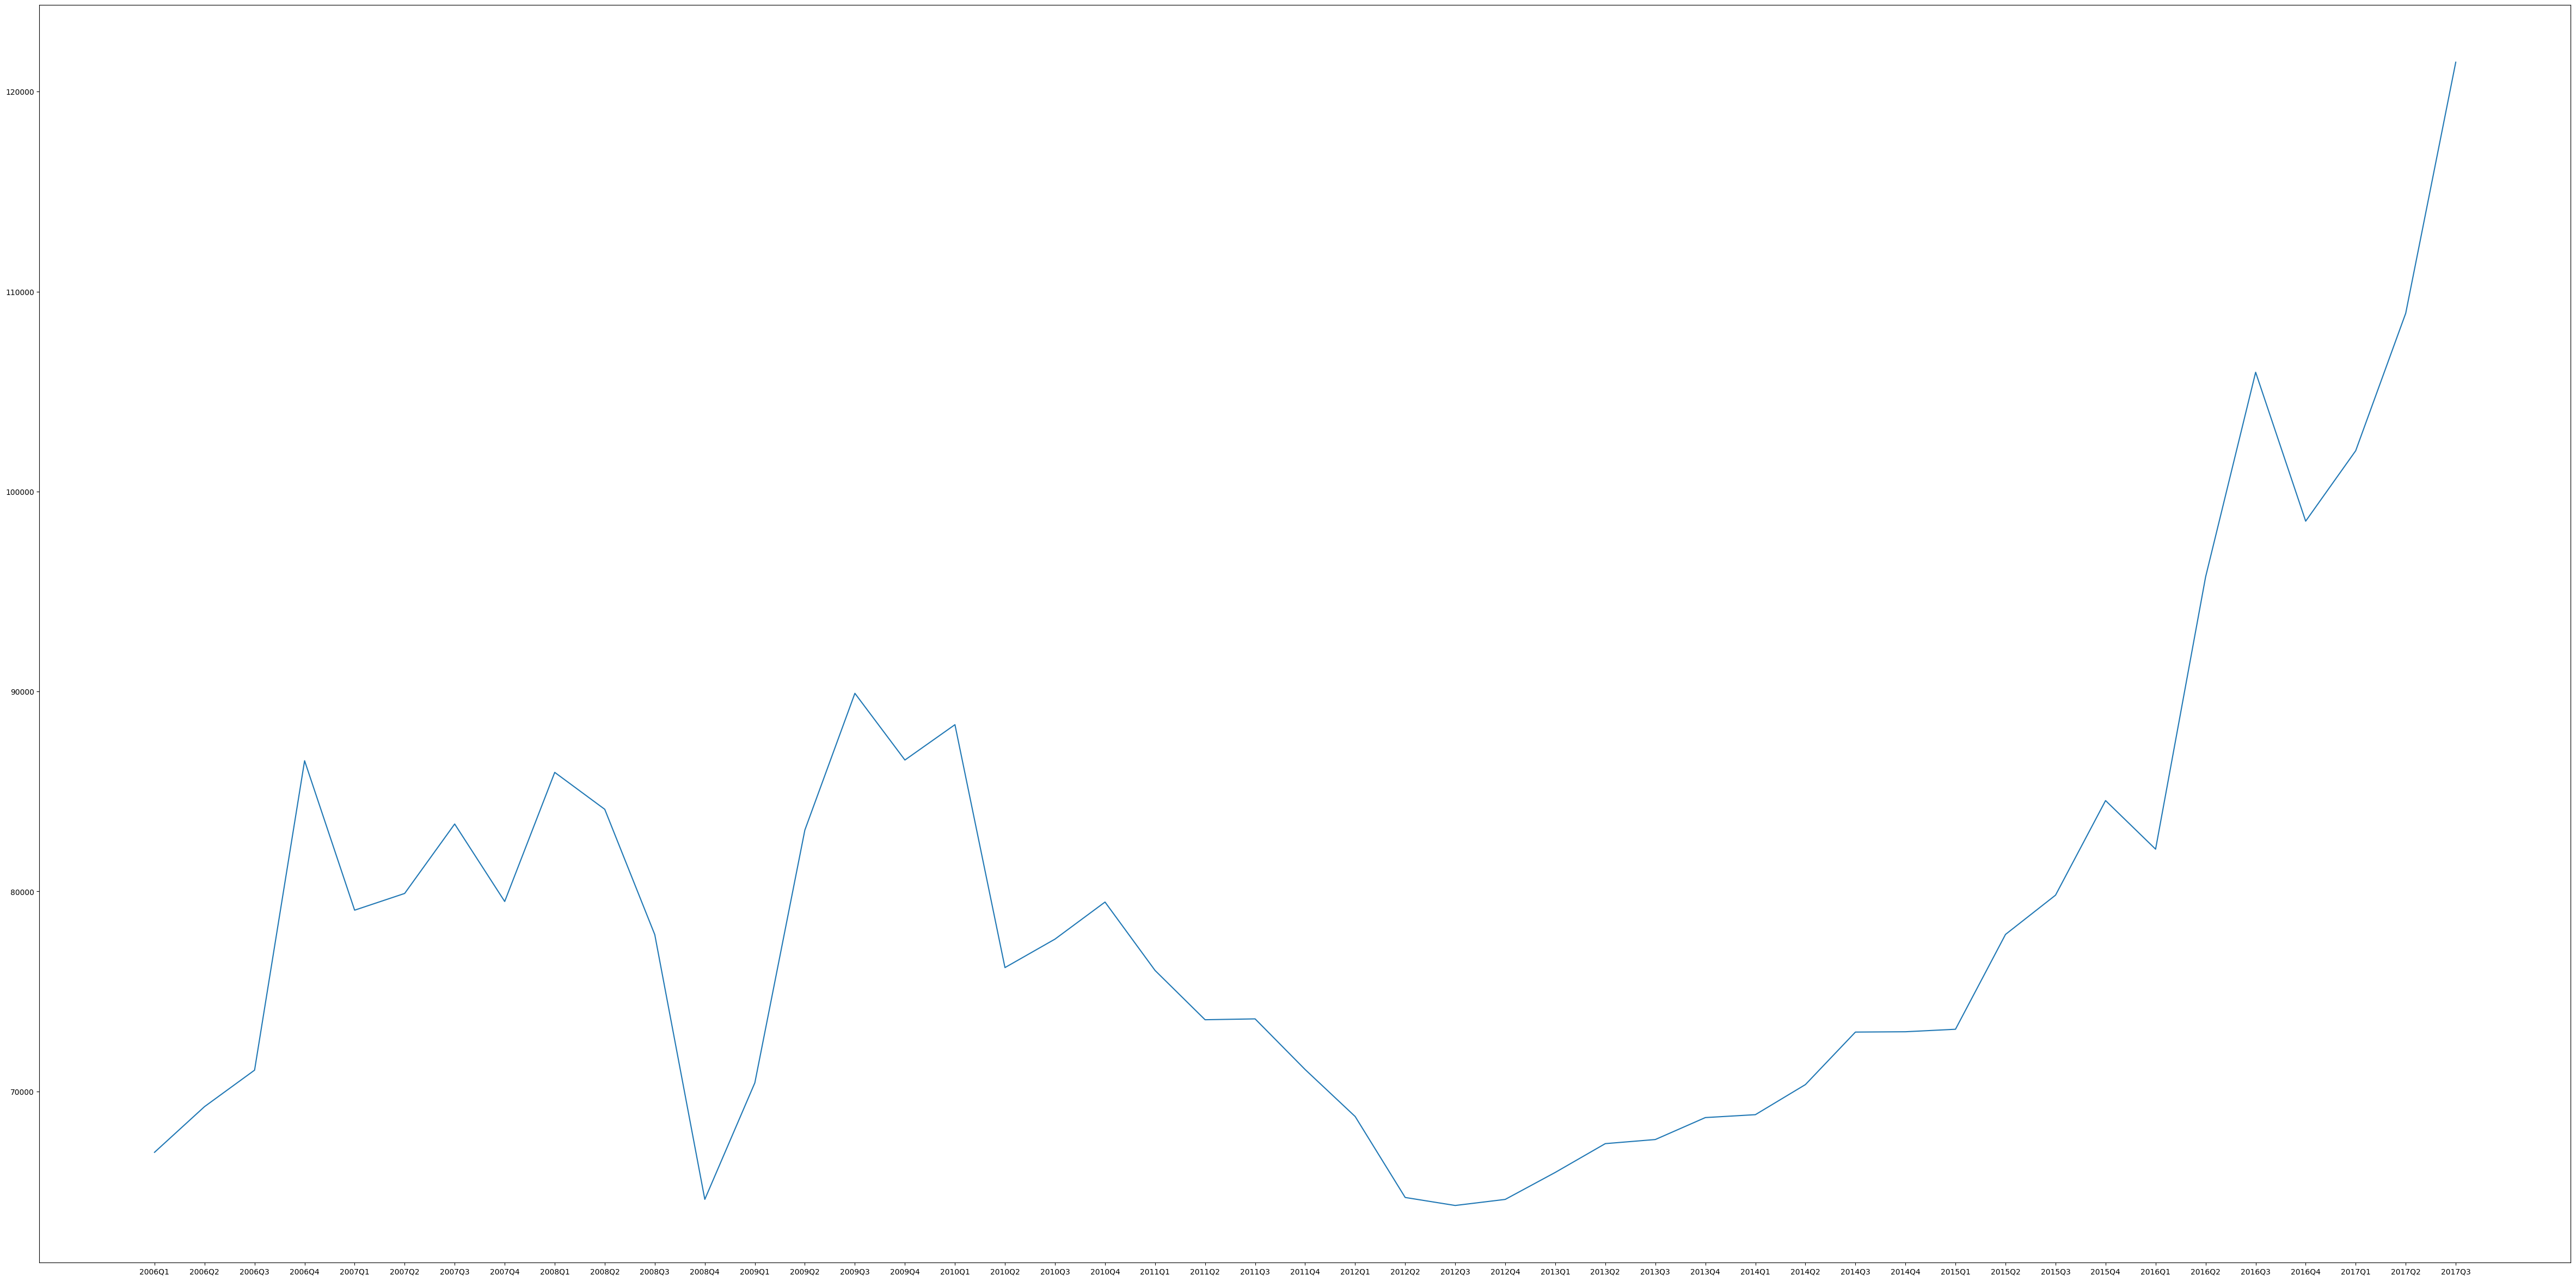

In [ ]:
plt.figure(figsize=(60,30))
plt.plot(data_gaepo_time['price'])

<ipython-input-13-e61375895a15>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean().copy()


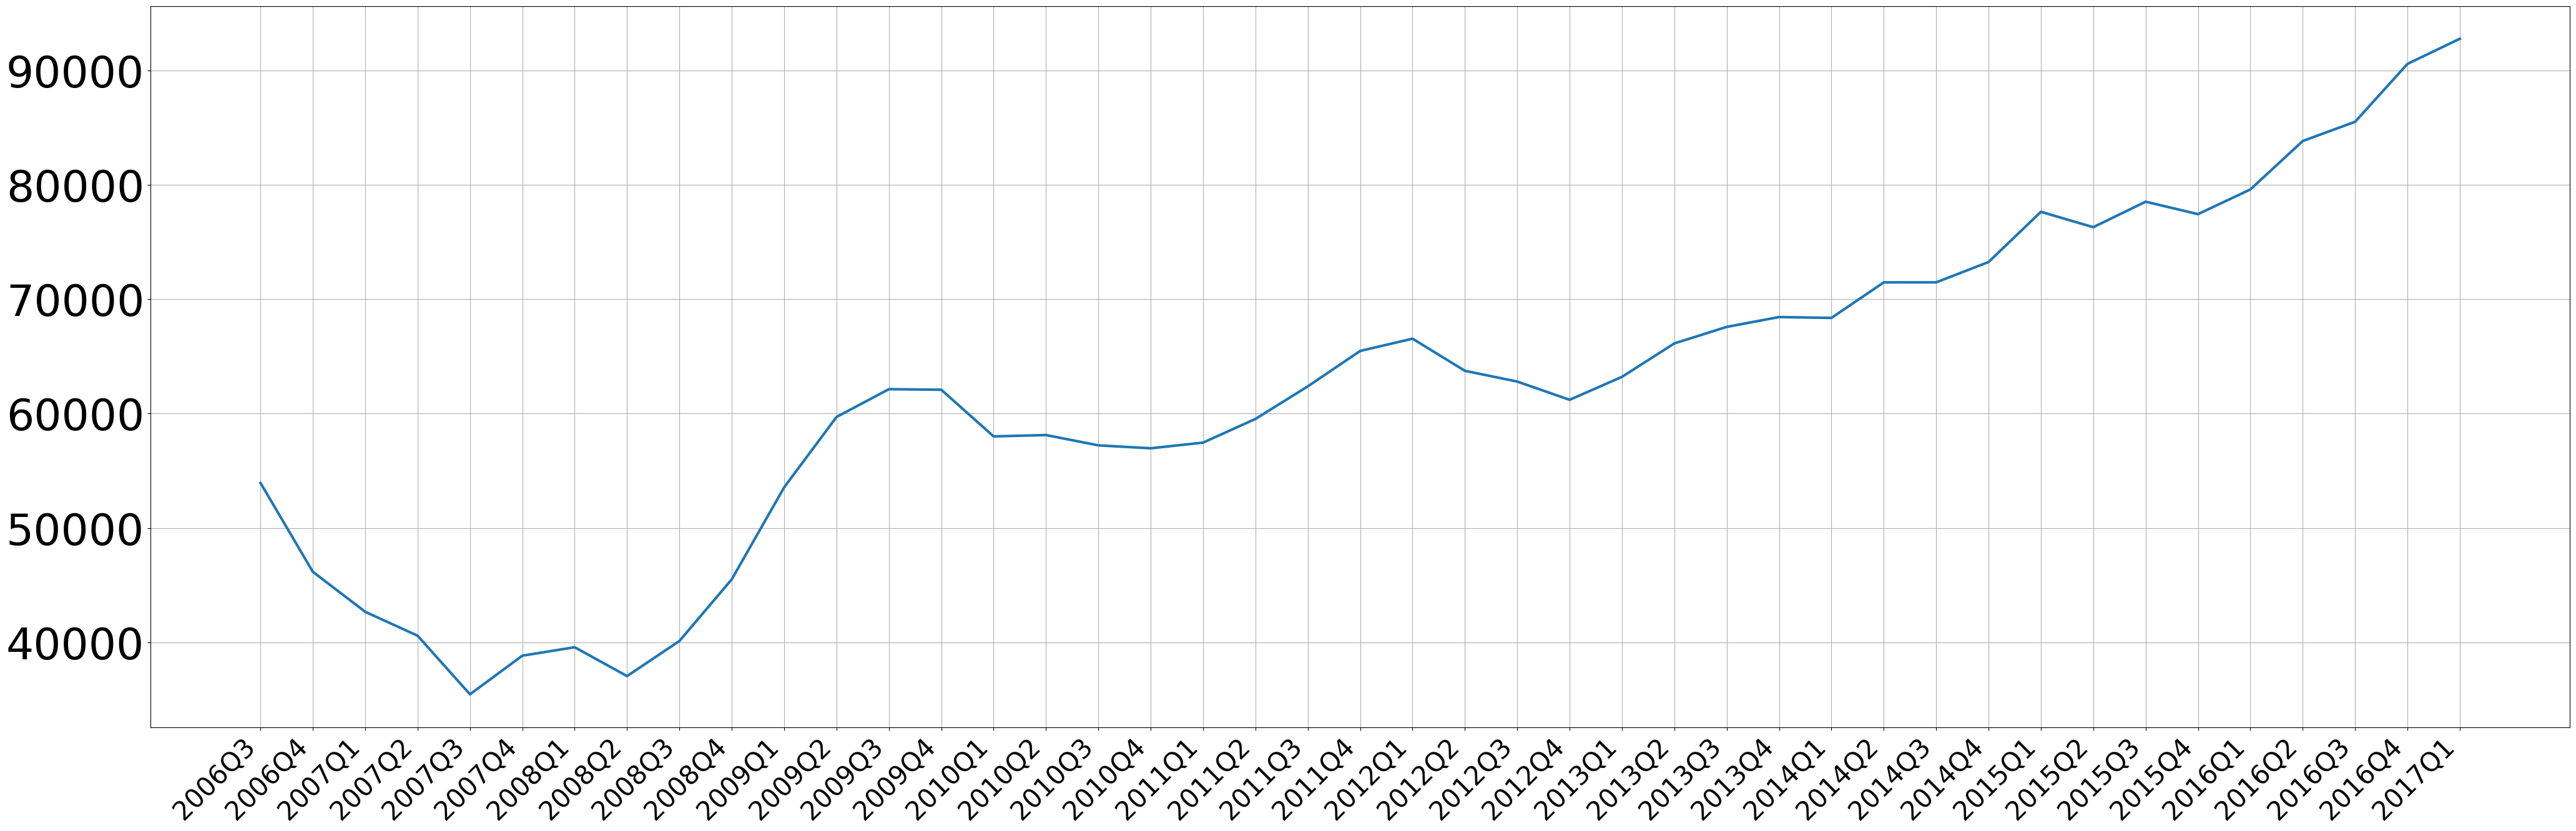

In [ ]:
nMA = 2

plt.figure(figsize=(50,15))
tmp=df[df['dong(동)']=="역삼동"]
tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean().copy()
ls=[]
for j in range(nMA, len(tp)-nMA):
  ls.append(tp['price(가격)'].iloc[j-nMA:j+nMA].mean())
df_mean5=pd.DataFrame({"Time" : tp.index.values[nMA:len(tp)-nMA], "Mean_Price" : ls })
plt.plot(df_mean5["Time"],df_mean5["Mean_Price"],linewidth=3.0)
plt.yticks(fontsize=50); plt.xticks(fontsize=30, rotation=45, ha='right')
plt.grid(True)
df_mean5.set_index("Time", inplace=True)

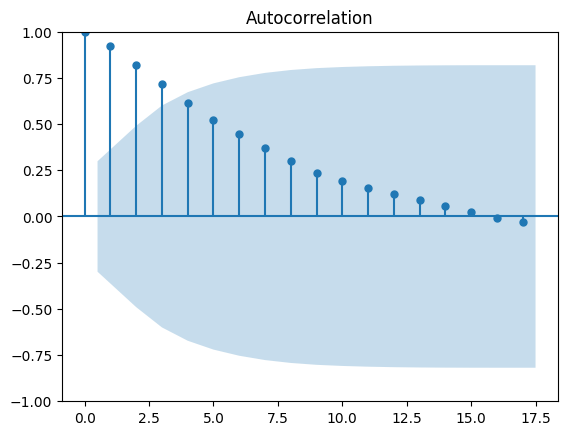

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_mean5)
plt.show()